This jupyter notebook runs an autoencoder neural network that supposedly learns a digit from 0-9 given its pixeled image. It does not do this well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import (io, nn, preprocess)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

(1797, 64)


<Figure size 432x288 with 0 Axes>

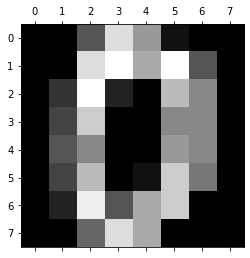

In [2]:
# simulate dataset
digits = load_digits()
print(digits.data.shape)
X_all = digits.data
y_all = digits.target
# view first digit
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [3]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1203, 64)
(1203,)


Autoencoder with 64 x 16 x 64 x 1 layers
The two first layers use a ReLU activation function because the digits can be
considered as a linear function with outputs ranging from 0 to 9. The final 
layer is a single node that condenses the output with a sigmoid activation function.
This compresses the values to be between 0 and 1.

In [4]:
test_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},{'input_dim': 16, 'output_dim': 64, 'activation': 'relu'},{'input_dim': 64, 'output_dim': 1, 'activation': 'sigmoid'}]

	
<br>
	Selection of hyperparamaters:<br>
	I selected the Mean Square Error loss function because the network is using linear<br>
	regression to separate the digits from 0 to 9.<br>
	I selected the other hyperparameters through trial and error until I got ok results.<br>


In [5]:
nn_auto = nn.NeuralNetwork(nn_arch = test_arch, lr = 0.001, seed = 29, batch_size = 200,epochs = 100, loss_function = "mse")
# because the last layer of the network is a sigmoid function the outputs are between 0 and 1
# so I multiply the y arrays by 0.1 in order to match
(train_auto_loss, val_auto_loss) = nn_auto.fit(X_train.T, y_train * 0.1, X_test.T, y_test * 0.1)
print("DONE")

EPOCH: 1
[0.40225644 0.19945596 0.45160388 0.43233556 0.3303128  0.31505084
 0.34608079 0.46380758 0.46720737 0.48706023]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 2
[0.73454715 0.57409282 0.71271045 0.80436205 0.60898424 0.53930975
 0.72004566 0.67068948 0.75192556 0.7492889 ]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 3
[0.18142291 0.06362131 0.11429076 0.11350641 0.0729065  0.088522
 0.08977348 0.22519083 0.1878784  0.14285084]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 4
[0.44405604 0.25299903 0.3381576  0.4303588  0.25442491 0.27515282
 0.31890111 0.41910893 0.41468683 0.39366222]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 5
[0.56200896 0.38416229 0.45994884 0.5986635  0.37242751 0.40631197
 0.45303939 0.5103375  0.51510468 0.51028521]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 6
[0.51081222 0.30644496 0.34833395 0.50006895 0.27389919 0.31807601
 0.37722268 0.43950265 0.46780557 0.40268852]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 7
[0.615765

[0.62881238 0.56089885 0.21350626 0.5624942  0.19349367 0.39748202
 0.39522259 0.27218966 0.61521155 0.20836122]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 60
[0.67013064 0.67656794 0.28068152 0.66381832 0.24757238 0.46087146
 0.43245052 0.32537395 0.67898578 0.26692989]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 61
[0.65300514 0.63183699 0.23270387 0.61838642 0.21004263 0.43959095
 0.41141451 0.2826232  0.64968438 0.22186708]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 62
[0.67635146 0.67002975 0.26181196 0.6493077  0.22473867 0.45643357
 0.42262232 0.29898271 0.66346581 0.24305112]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 63
[0.67650986 0.64305703 0.26790033 0.63560181 0.22063142 0.42243982
 0.41545048 0.29808721 0.65064978 0.2479748 ]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 64
[0.67625367 0.62634765 0.27342423 0.62271805 0.22709145 0.40495348
 0.40957504 0.29409369 0.64196779 0.24899423]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 65
[0.6896369

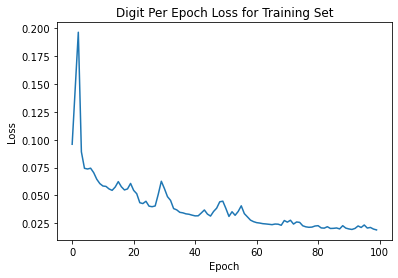

In [6]:
# plot losses
plt.figure()
plt.plot(train_auto_loss)
plt.title("Digit Per Epoch Loss for Training Set")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

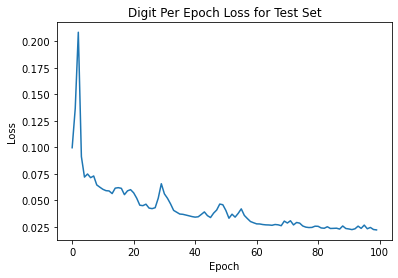

In [7]:
plt.figure()
plt.plot(val_auto_loss)
plt.title("Digit Per Epoch Loss for Test Set")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
# Evaluate
model_prob = nn_auto.predict(X_test.T)
model_pred = np.floor(model_prob * 10)
print(model_prob[0:10])
print(model_pred[0:10])
print(y_test[0:10])
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, model_pred))

[0.70343029 0.71684408 0.28142661 0.6352328  0.25104117 0.37942303
 0.41879214 0.26859192 0.57825027 0.25598089]
[7. 7. 2. 6. 2. 3. 4. 2. 5. 2.]
[6 9 3 7 2 1 5 2 5 2]
CONFUSION MATRIX
[[23 24  5  2  1  0  0  0  0  0]
 [ 2 17 15 13  5  1  2  0  0  0]
 [ 4 24 17  6  1  0  0  0  0  0]
 [ 0  2 13 12 14  9  6  0  0  0]
 [ 0  4  7 13 21 11  7  0  1  0]
 [ 0  1  1  1 19 26 17  8  0  0]
 [ 0  0  1  2  4 17 23 10  0  0]
 [ 0  0  0  1  0  3 24 26  8  0]
 [ 0  0  1  3  2  6  8 19 13  0]
 [ 0  0  0  0  1  7  6 23 27  4]]


In [9]:
print('CLASSFICATION REPORT')
print(classification_report(y_test, model_pred))

CLASSFICATION REPORT
              precision    recall  f1-score   support

           0       0.79      0.42      0.55        55
           1       0.24      0.31      0.27        55
           2       0.28      0.33      0.30        52
           3       0.23      0.21      0.22        56
           4       0.31      0.33      0.32        64
           5       0.33      0.36      0.34        73
           6       0.25      0.40      0.31        57
           7       0.30      0.42      0.35        62
           8       0.27      0.25      0.26        52
           9       1.00      0.06      0.11        68

    accuracy                           0.31       594
   macro avg       0.40      0.31      0.30       594
weighted avg       0.41      0.31      0.30       594



In [10]:
# Reconstruction Error
(y_hat,cache) = nn_auto.forward(X_test.T)
# the reconstructed images are stored in A2 -- the output of the second layer
reconstruction = cache['A2']
print("RECONSTRUCTION ERROR (MSE)")
reconstruction_error = nn_auto._mean_squared_error(X_test.T, reconstruction)
print(reconstruction_error)
print("PREDICTION ERROR (MSE)")
prediction_error = nn_auto._mean_squared_error(y_test, model_pred)
print(prediction_error)
print("On average, the predicted digit is within " + str(round(np.sqrt(prediction_error), 2)) + " of the actual digit")

RECONSTRUCTION ERROR (MSE)
55.18572266160545
PREDICTION ERROR (MSE)
2.2845117845117846
On average, the predicted digit is within 1.51 of the actual digit
